In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
print(os.listdir("../"))
# Any results you write to the current directory are saved as output.

['dot_traffic_2015.txt.gz', 'dot_traffic_stations_2015.txt.gz']
['working', 'input', 'src', 'lib']


The purpose of this notebook is to explore Traffic in the San Diego region for 2015. This exploratory analysis was done as part of the SDSU Big Data Hackathon in 2019. 

The data was taken from the following dataset https://www.kaggle.com/jboysen/us-traffic-2015.

In [2]:
#Importing data
traffic_2015 = pd.read_csv("../input/dot_traffic_2015.txt.gz")
traffic_2015_stations = pd.read_csv("../input/dot_traffic_stations_2015.txt.gz")


In [3]:
#Reviewing information found within dataset
print(traffic_2015.columns)
print(traffic_2015_stations.columns)

Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'direction_of_travel_name', 'fips_state_code',
       'functional_classification', 'functional_classification_name',
       'lane_of_travel', 'month_of_data', 'record_type', 'restrictions',
       'station_id', 'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_

Reviewing the columns for both traffic_2015 and traffic_2015_stations we see that traffic_2015 dataframe contains the data that we care about which is the traffic volume and hour the traffic was taken. We are only looking for the traffic in the San Diego region. In traffic_2015 we have the station_id but external searching through the US Transportation website doesn't tell us which stations are within San Diego county.

In order to obtain this information we will have to look at the latitude (north/south) and longitude(east/west) for San Diego and find all stations within this region. 

In [4]:
#Google maps was used to find the fatherst north,south,east,west latitutde and longitude points 
lat_north = 33.506573
lat_south = 32.568381

#San Diego Latitude and Longitude contains a negative value. Since we are dealing only with data from the US the dataset
#does not contain negative values 
long_west = 117.596359 
long_east = 116.081831 

#Filtering out all values from the stations that are not within the San Diego region
sd_traffic_2015_stations = traffic_2015_stations[(traffic_2015_stations["longitude"] <= long_west) \
                     & (traffic_2015_stations["longitude"] >= long_east) \
                     & (traffic_2015_stations["latitude"] <= lat_north) \
                     & (traffic_2015_stations["latitude"] >= lat_south)]

#Dropping all columns except station_id, latitude and longitude in stations data
drop_columns = list(sd_traffic_2015_stations.columns.difference(['station_id','latitude','longitude']))
sd_traffic_2015_stations = sd_traffic_2015_stations.drop(drop_columns, axis = 1)

#We only care about the station id and longitude
#sd_traffic_2015_stations_ids = sd_traffic_2015_stations[["station_id","latitude","longitude"]]

#This is a list of all the station IDs found within San Diego and will give us the coordinates for those stations
station_ids = sorted(sd_traffic_2015_stations["station_id"].unique())

#Testing if station_id has more than one location. This could mean there is a mistake in the dataset
for s in station_ids:
    latitude = 0
    longitude = 0
    locations = sd_traffic_2015_stations[sd_traffic_2015_stations["station_id"] == s].loc[:,"latitude":"longitude"]
    latitude = locations["latitude"].unique()
    longitude = locations["latitude"].unique()
    if latitude.size > 1:
        print("Station id",s,"has more than one latitude")
        print(latitude)
    elif longitude.size > 1:
        print("Station id",s,"has more than on longitude")
        print(longitude)

#Filtering out all values for the California state code
sd_traffic_2015 = traffic_2015[traffic_2015["station_id"].isin(station_ids)]

#Creating a new data frame that merges the locations to our traffic data
sd_traffic_2015_locations = pd.merge(sd_traffic_2015, sd_traffic_2015_stations,\
                                    left_on='station_id',right_on='station_id')

#Comparing number of station IDs found 
print(len(sd_traffic_2015_stations["station_id"].unique()))
print(len(sd_traffic_2015["station_id"].unique()))

print("IDs that were not found in the traffic dataset:")
for sd in station_ids:
    if sd not in sd_traffic_2015_locations["station_id"].unique():
        print(sd)

sd_station_ids = sd_traffic_2015_locations["station_id"].unique()

16
13
IDs that were not found in the traffic dataset:
116840
118250
118260


We now have a dataframe containing the traffic throughout the year for San Diego at 13 different locations. The traffic_2015 dataframe does not contain all the station IDs that the traffic_2015_stations dataframe has. Since we do not have the data for those stations we can continue on using the 13 locations. Below shows a map with the different locations. 

In [5]:
import plotly
#Need to create code for a map showing the 13 different locations. From this map we will label the stations to
#show the different areas in San Diego as well as the station numbers 


Now let's take a look at the sd_traffic_2015_locations dataframe. 

In [6]:
print(sd_traffic_2015_locations.shape)
sd_traffic_2015_locations.columns

(103645, 40)


Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'direction_of_travel_name', 'fips_state_code',
       'functional_classification', 'functional_classification_name',
       'lane_of_travel', 'month_of_data', 'record_type', 'restrictions',
       'station_id', 'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_

We will take the average for each out for all stations and plot the data and compare to see how varied the traffic is

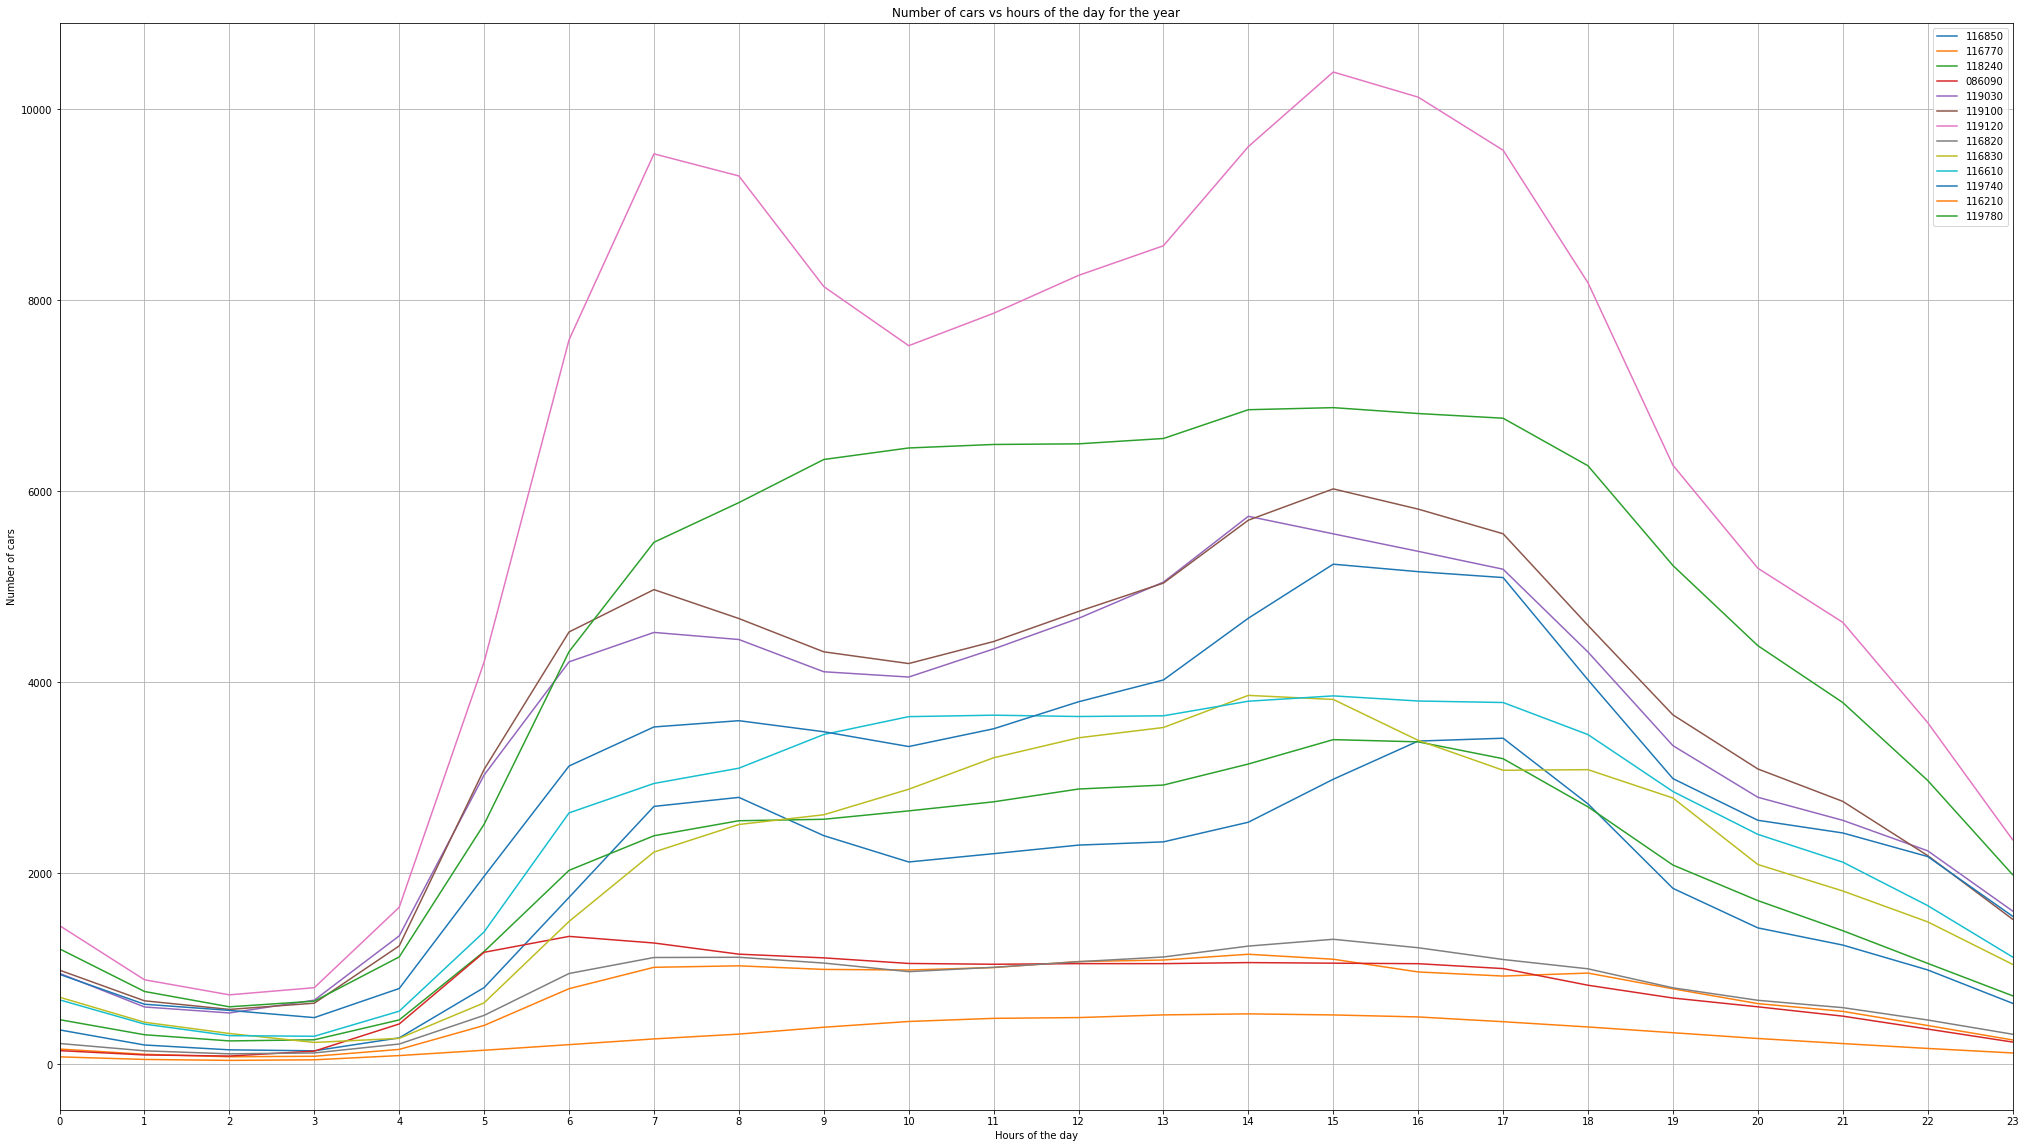

In [7]:
sd_traffic_mean_year = pd.DataFrame()
tmp = list()
for station in sd_station_ids:
    tmp = np.mean(sd_traffic_2015_locations[sd_traffic_2015_locations["station_id"] == station].loc\
                                [:,"traffic_volume_counted_after_0000_to_0100":\
                                 "traffic_volume_counted_after_2300_to_2400"])
    sd_traffic_mean_year[station] = tmp

fig = plt.figure(1,figsize=(35, 20))
ax = fig.gca()
ax.set_xticks(np.arange(0, 25, 1))
plt.title("Number of cars vs hours of the day for the year")
plt.xlabel("Hours of the day")
plt.ylabel("Number of cars")
plt.xlim((0,23))
for st in sd_station_ids:
    plt.plot(range(0,24,1),sd_traffic_mean_year[st])
plt.legend()
plt.grid()



We can see from the data that traffic patterns seem to be the same throughout the county. Around 4am traffic increases until about 9am. Traffic will begin decreasing around 5pm - 11pm. 